<a href="https://colab.research.google.com/github/AnnayanB/NLP_TextAnalytics/blob/main/NLP_TextAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Statements**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading and inspecting data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Almabetter_Capstone/NLP_TextAnalytics/authors.csv")

In [ ]:
data.head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [ ]:
data.iloc[0]['text']

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [ ]:
data.shape

(19579, 3)

## **Bar chart of class proportion**

In [ ]:
# extracting the number of examples of each class
EAP_len = data[data['author'] == 'EAP'].shape[0]
HPL_len = data[data['author'] == 'HPL'].shape[0]
MWS_len = data[data['author'] == 'MWS'].shape[0]

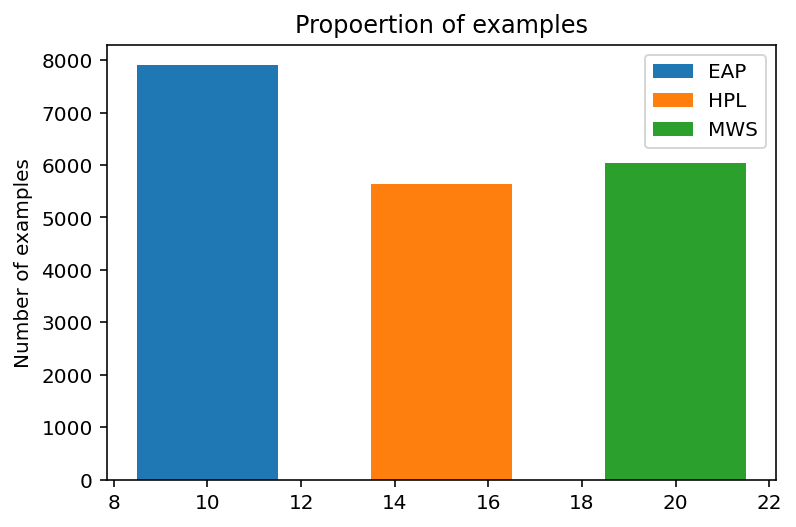

In [ ]:
# bar plot of the 3 classes
plt.bar(10,EAP_len,3, label="EAP")
plt.bar(15,HPL_len,3, label="HPL")
plt.bar(20,MWS_len,3, label="MWS")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

## **Removing punctuations**

## **Funtion to remove punctuation**

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

## **Apply the function to each examples**

In [ ]:
data['text'] = data['text'].apply(remove_punctuation)
data.head(10)

,id,text,author
0,id26305,This process however afforded me no means of a...,EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,In his left hand was a gold snuff box from whi...,EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,Finding nothing else not even gold the Superin...,HPL
5,id22965,A youth passed in solitude my best years spent...,MWS
6,id09674,The astronomer perhaps at this point took refu...,EAP
7,id13515,The surcingle hung in ribands from my body,EAP
8,id19322,I knew that you could not say to yourself ster...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


## **Removing stopwords**

**Extract the stop words**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


## **Function to remove stopwords**

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
data['text'] = data['text'].apply(stopwords)
data.head(10)

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL
5,id22965,youth passed solitude best years spent gentle ...,MWS
6,id09674,astronomer perhaps point took refuge suggestio...,EAP
7,id13515,surcingle hung ribands body,EAP
8,id19322,knew could say stereotomy without brought thin...,EAP
9,id00912,confess neither structure languages code gover...,MWS


## **Top words before stemming**

## **Collect vocabulary count**

In [ ]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['text'])
bag_of_words = count_vectorizer.fit_transform(data['text'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:20])

[('one', 1614), ('upon', 1411), ('could', 1316), ('would', 1241), ('man', 730), ('time', 729), ('yet', 715), ('said', 704), ('even', 701), ('might', 629), ('old', 616), ('like', 613), ('first', 602), ('us', 595), ('must', 594), ('never', 570), ('made', 565), ('life', 562), ('found', 559), ('night', 559)]


### Store the vocab and counts in a pandas dataframe

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for i in words_freq:
    vocab.append(i[0])
    count.append(i[1])
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

### **Bar plot of top words before stemming**

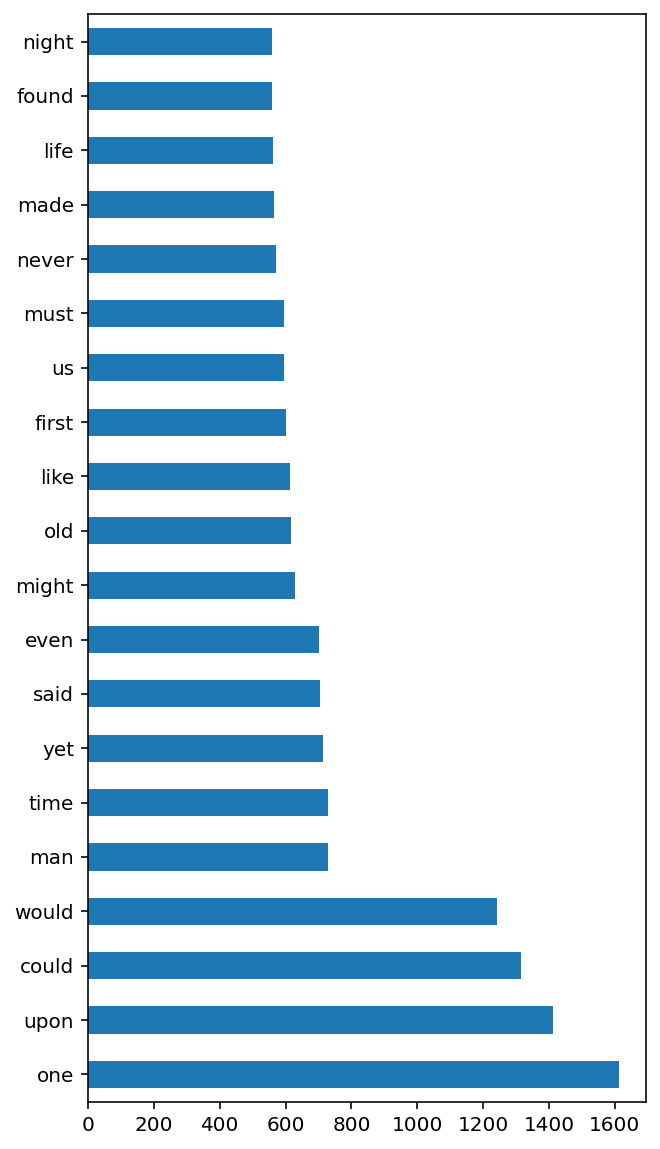

In [ ]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

##  **Stemming operations**

### Stemming operation bundles together words of same root. e.g. stem operation bundles "response" and "respond" into a common "respon" 

**A funtion to carry out stemming operation**

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

**Apply the function to each examples**

In [ ]:
data['text'] = data['text'].apply(stemming)
data.head(10)

,id,text,author
0,id26305,process howev afford mean ascertain dimens dun...,EAP
1,id17569,never occur fumbl might mere mistak,HPL
2,id11008,left hand gold snuff box caper hill cut manner...,EAP
3,id27763,love spring look windsor terrac sixteen fertil...,MWS
4,id12958,find noth els even gold superintend abandon at...,HPL
5,id22965,youth pass solitud best year spent gentl femin...,MWS
6,id09674,astronom perhap point took refug suggest non l...,EAP
7,id13515,surcingl hung riband bodi,EAP
8,id19322,knew could say stereotomi without brought thin...,EAP
9,id00912,confess neither structur languag code govern p...,MWS


## **Top words after stemming operation**

**Collect vocabulary count**

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words="english")

# fit the vectorizer using the text data
tfid_vectorizer.fit(data['text'])

bag_of_words1 = tfid_vectorizer.fit_transform(data['text'])
sum_words1 = bag_of_words1.sum(axis=0)
words_freq1 = [(word, sum_words1[0, idx]) for word, idx in tfid_vectorizer.vocabulary_.items()]
words_freq1 =sorted(words_freq1, key = lambda x: x[1], reverse=True)
print(words_freq1[:20])

[('said', 156.74017741853402), ('time', 154.4198257349849), ('man', 144.30006148564362), ('thing', 143.8497999258517), ('day', 133.61190368420557), ('eye', 126.54180491150035), ('night', 117.79623016649278), ('thought', 117.19545296581114), ('look', 116.04607848394957), ('old', 110.73069811158433), ('say', 109.97354670379109), ('like', 109.35589358394165), ('life', 108.95280917033891), ('great', 107.38059099615634), ('love', 106.30759922839496), ('saw', 106.03000807122744), ('long', 105.29554724600057), ('littl', 103.88841347891393), ('everi', 100.4787400570435), ('place', 99.90812687763692)]


**Bar plot of top words after stemming**

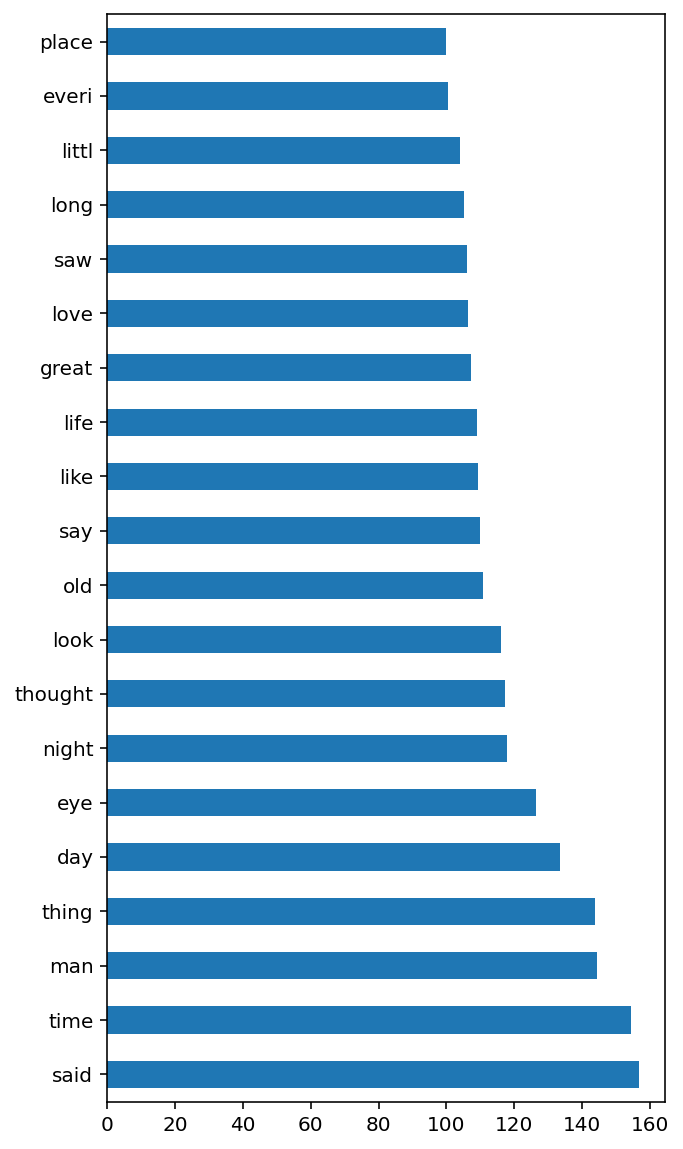

In [ ]:
# lists to store the vocab and counts
vocab1 = []
count1 = []
# iterate through each vocab and count append the value to designated lists
for i in words_freq1:
    vocab1.append(i[0])
    count1.append(i[1])
# store the count in panadas dataframe with vocab as index
vocab_after_stem1 = pd.Series(count1, index=vocab1)
# sort the dataframe
vocab_after_stem1 = vocab_after_stem1.sort_values(ascending=False)
# plot of the top vocab
top_vacab1 = vocab_after_stem1.head(20)
top_vacab1.plot(kind = 'barh', figsize=(5,10))

## **Histogram of text length of each writer**

A function to return the length of text

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

Apply the function to each example

In [ ]:
data['length'] = data['text'].apply(length)
data.head(10)

,id,text,author,length
0,id26305,process howev afford mean ascertain dimens dun...,EAP,136
1,id17569,never occur fumbl might mere mistak,HPL,35
2,id11008,left hand gold snuff box caper hill cut manner...,EAP,113
3,id27763,love spring look windsor terrac sixteen fertil...,MWS,137
4,id12958,find noth els even gold superintend abandon at...,HPL,102
5,id22965,youth pass solitud best year spent gentl femin...,MWS,265
6,id09674,astronom perhap point took refug suggest non l...,EAP,75
7,id13515,surcingl hung riband bodi,EAP,25
8,id19322,knew could say stereotomi without brought thin...,EAP,267
9,id00912,confess neither structur languag code govern p...,MWS,80


**Extracting data of each class**

In [ ]:
EAP_data = data[data['author'] == 'EAP']
HPL_data = data[data['author'] == 'HPL']
MWS_data = data[data['author'] == 'MWS']

**Histogram of text lenght of  each writer**

As we can see the distributions coincides so it better to leave out text length as a feature for predictive modelling

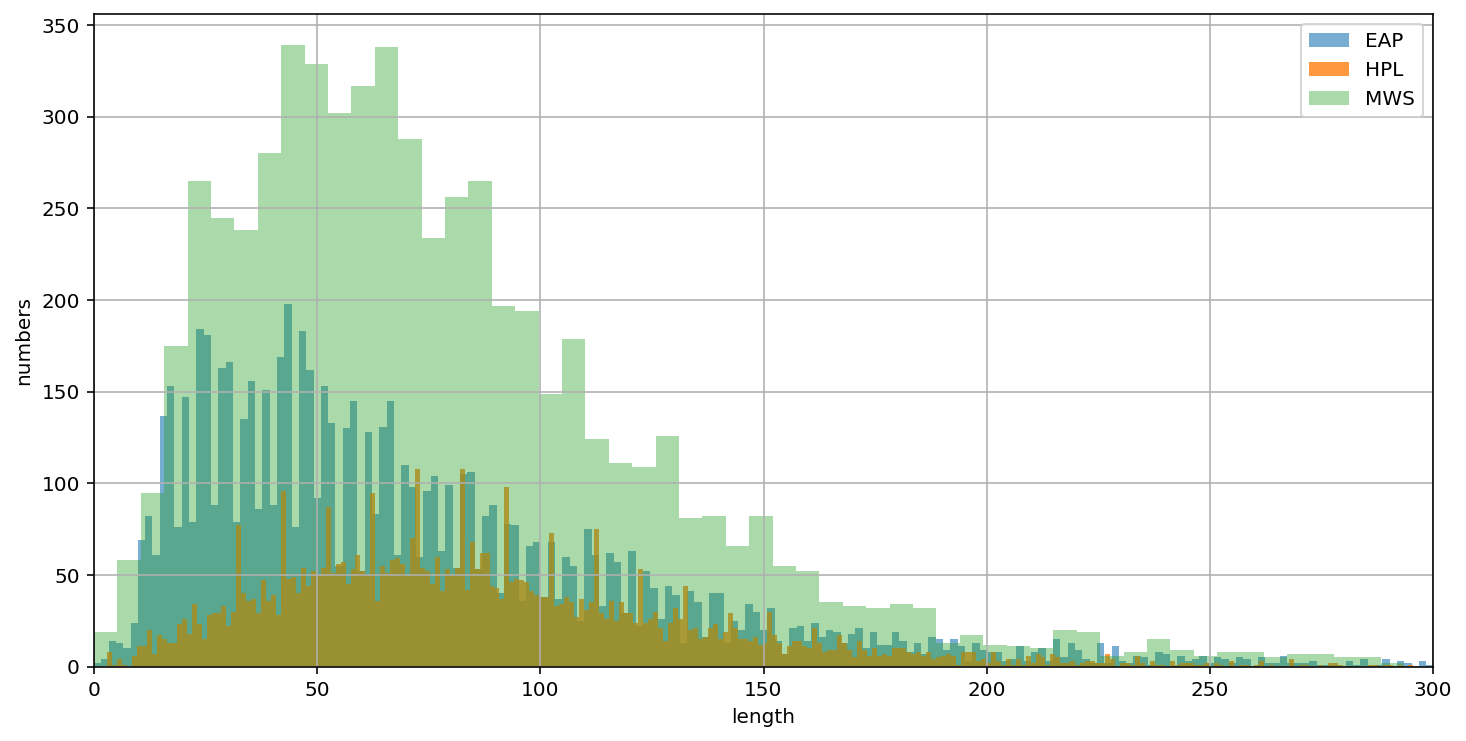

In [ ]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(EAP_data['length'], alpha = 0.6, bins=bins, label='EAP')
plt.hist(HPL_data['length'], alpha = 0.8, bins=bins, label='HPL')
plt.hist(MWS_data['length'], alpha = 0.4, bins=bins, label='MWS')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

# **Top words of each writer and their count**

## **Edgar Allan Poe**

[('said', 156.74017741853402), ('time', 154.4198257349849), ('man', 144.30006148564362), ('thing', 143.8497999258517), ('day', 133.61190368420557), ('eye', 126.54180491150035), ('night', 117.79623016649278), ('thought', 117.19545296581114), ('look', 116.04607848394957), ('old', 110.73069811158433), ('say', 109.97354670379109), ('like', 109.35589358394165), ('life', 108.95280917033891), ('great', 107.38059099615634), ('love', 106.30759922839496), ('saw', 106.03000807122744), ('long', 105.29554724600057), ('littl', 103.88841347891393), ('everi', 100.4787400570435), ('place', 99.90812687763692)]


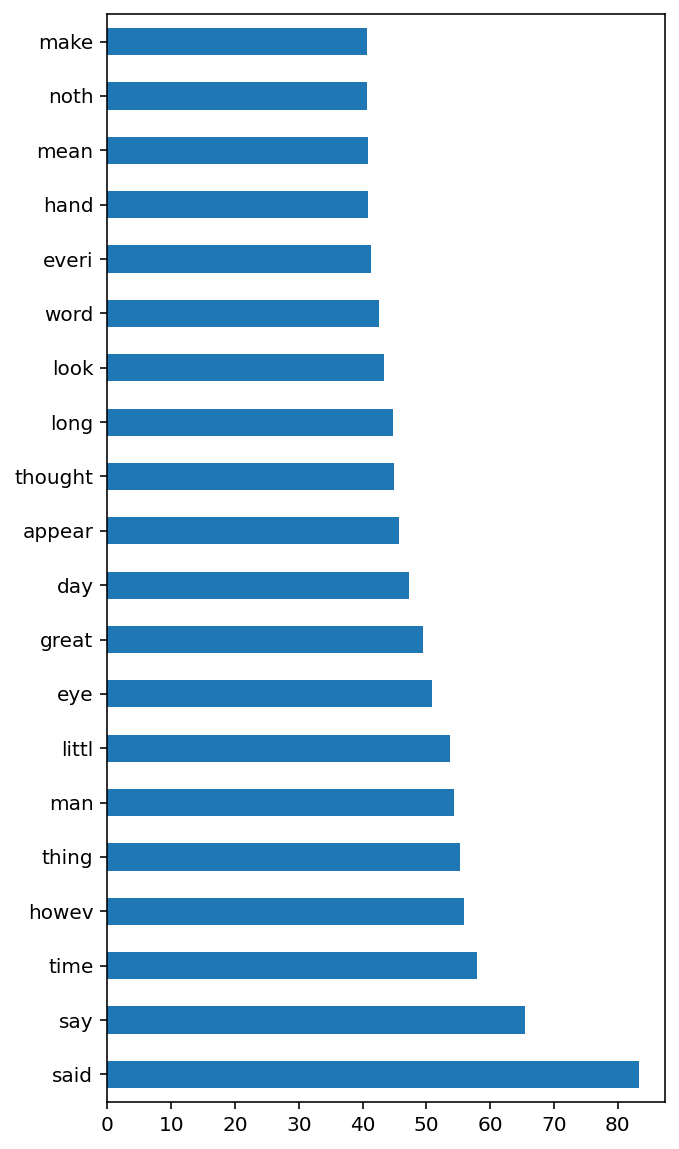

In [ ]:
# create the object of tfid vectorizer
EAP_tfid_vectorizer = TfidfVectorizer(stop_words="english")
# fit the vectorizer using the text data
EAP_tfid_vectorizer.fit(EAP_data['text'])
bag_of_words2 = EAP_tfid_vectorizer.fit_transform(EAP_data['text'])
sum_words2 = bag_of_words2.sum(axis=0)
words_freq2 = [(word, sum_words2[0, idx]) for word, idx in EAP_tfid_vectorizer.vocabulary_.items()]
words_freq2 =sorted(words_freq2, key = lambda x: x[1], reverse=True)
print(words_freq1[:20])

# lists to store the vocab and counts
vocab2 = []
count2 = []
# iterate through each vocab and count append the value to designated lists
for i in words_freq2:
    vocab2.append(i[0])
    count2.append(i[1])
# store the count in panadas dataframe with vocab as index
vocab_after_stem2 = pd.Series(count2, index=vocab2)
# sort the dataframe
vocab_after_stem2 = vocab_after_stem2.sort_values(ascending=False)
# plot of the top vocab
top_vacab2 = vocab_after_stem2.head(20)
top_vacab2.plot(kind = 'barh', figsize=(5,10))

## **HP Lovecraft**

[('thing', 70.93458725509387), ('old', 61.27894611083012), ('night', 50.07319870355974), ('time', 49.92553243608817), ('man', 49.35205278565504), ('like', 49.34094572983951), ('hous', 45.32271929941102), ('saw', 45.20802406483561), ('came', 43.731390715526345), ('know', 40.65948186013776), ('look', 39.73397746306408), ('come', 38.52525610212309), ('men', 38.38309494122814), ('dream', 38.309158519118796), ('great', 38.11023097473225), ('place', 37.10916321934229), ('day', 36.5514302064165), ('strang', 36.32533634580537), ('heard', 34.943545046636366), ('knew', 34.02872388025245)]


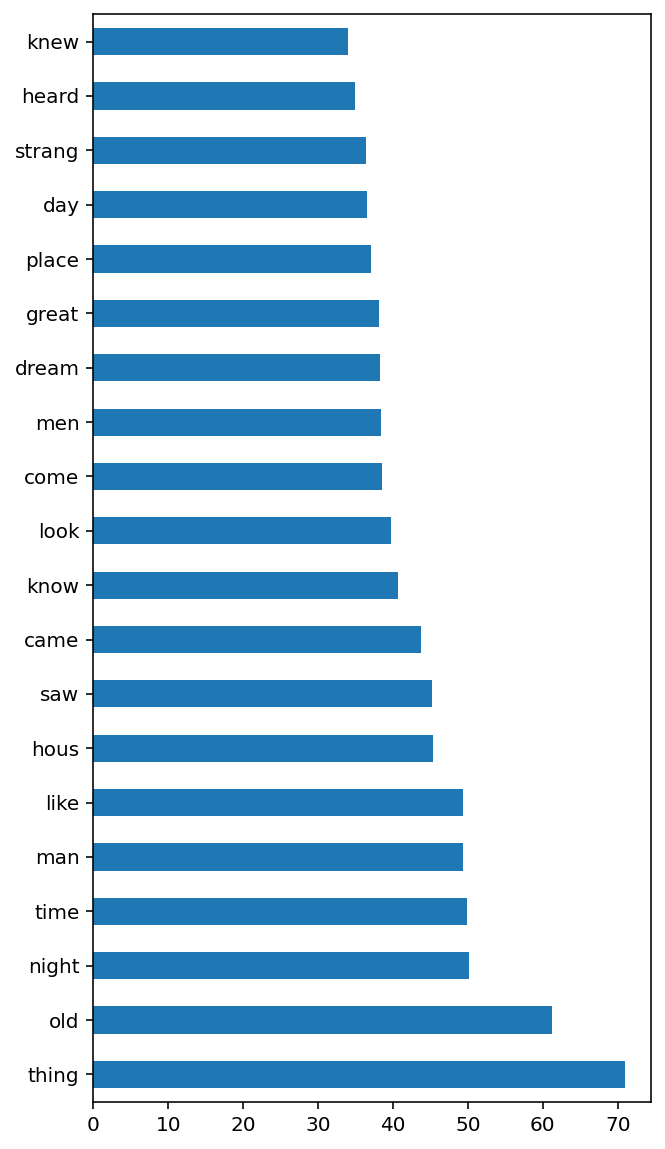

In [ ]:
# create the object of tfid vectorizer
HPL_tfid_vectorizer = TfidfVectorizer(stop_words="english")
# fit the vectorizer using the text data
HPL_tfid_vectorizer.fit(HPL_data['text'])
bag_of_words3 = HPL_tfid_vectorizer.fit_transform(HPL_data['text'])
sum_words3 = bag_of_words3.sum(axis=0)
words_freq3 = [(word, sum_words3[0, idx]) for word, idx in HPL_tfid_vectorizer.vocabulary_.items()]
words_freq3 =sorted(words_freq3, key = lambda x: x[1], reverse=True)
print(words_freq3[:20])

# lists to store the vocab and counts
vocab3 = []
count3 = []
# iterate through each vocab and count append the value to designated lists
for i in words_freq3:
    vocab3.append(i[0])
    count3.append(i[1])
# store the count in panadas dataframe with vocab as index
vocab_after_stem3 = pd.Series(count3, index=vocab3)
# sort the dataframe
vocab_after_stem3 = vocab_after_stem3.sort_values(ascending=False)
# plot of the top vocab
top_vacab3 = vocab_after_stem3.head(20)
top_vacab3.plot(kind = 'barh', figsize=(5,10))

## **Mary Shelley**

[('love', 74.6528176106527), ('life', 58.836287833240974), ('raymond', 56.624019943541704), ('day', 54.63585420280086), ('feel', 53.4613836689854), ('time', 52.82095516879125), ('heart', 51.21662127481676), ('eye', 48.380004701255636), ('said', 47.1183888140354), ('man', 46.497068174812824), ('hope', 45.93113081216241), ('thought', 45.233777150216426), ('fear', 45.211456035103154), ('friend', 45.14729579934972), ('everi', 42.83766744289459), ('perdita', 42.426503486793955), ('father', 42.20463663609961), ('happi', 42.16015225104317), ('return', 41.90090501993332), ('death', 40.85543996630145)]


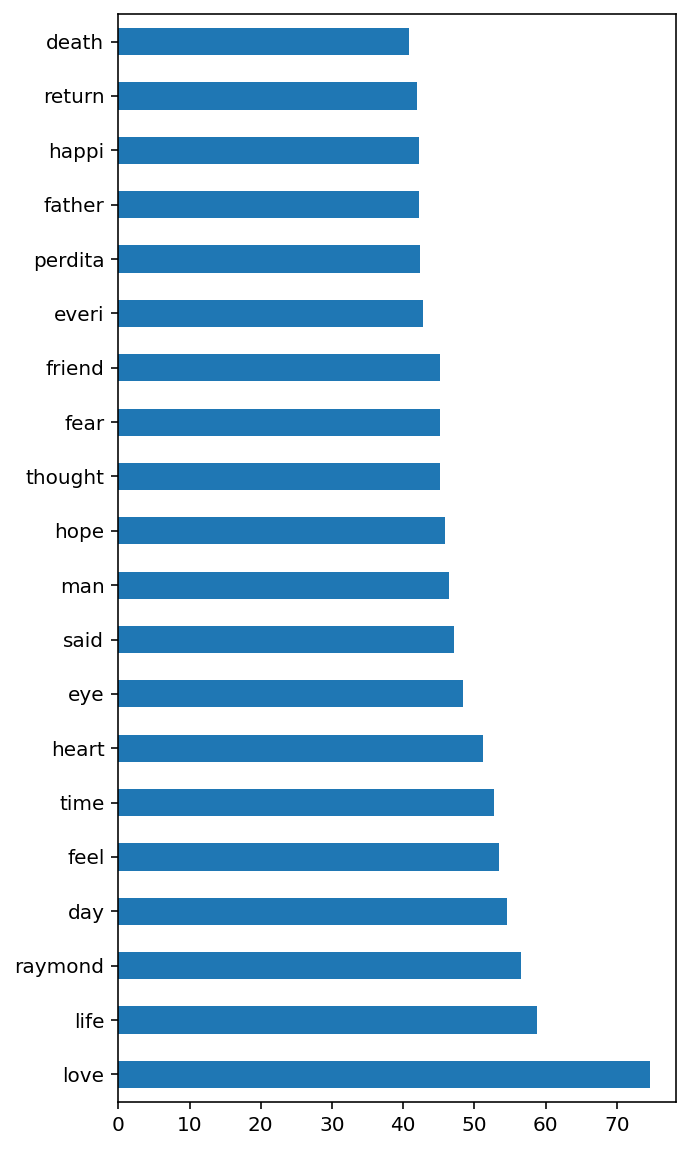

In [ ]:
# create the object of tfid vectorizer
MWS_tfid_vectorizer = TfidfVectorizer(stop_words="english")
# fit the vectorizer using the text data
MWS_tfid_vectorizer.fit(MWS_data['text'])
bag_of_words4 = MWS_tfid_vectorizer.fit_transform(MWS_data['text'])
sum_words4 = bag_of_words4.sum(axis=0)
words_freq4 = [(word, sum_words4[0, idx]) for word, idx in MWS_tfid_vectorizer.vocabulary_.items()]
words_freq4 =sorted(words_freq4, key = lambda x: x[1], reverse=True)
print(words_freq4[:20])

# lists to store the vocab and counts
vocab4 = []
count4 = []
# iterate through each vocab and count append the value to designated lists
for i in words_freq4:
    vocab4.append(i[0])
    count4.append(i[1])
# store the count in panadas dataframe with vocab as index
vocab_after_stem4 = pd.Series(count4, index=vocab4)
# sort the dataframe
vocab_after_stem4 = vocab_after_stem4.sort_values(ascending=False)
# plot of the top vocab
top_vacab4 = vocab_after_stem4.head(20)
top_vacab4.plot(kind = 'barh', figsize=(5,10))

**As we can see the top words of each writer are cleary distinct and are in huge numbers. Word Count or TF-IDF of the can provide a good feature**

# **TF-IDF Extraction**

### tf-idf weight is product of two terms: the first term is the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

### IDF(t) = $log_e(\frac{Total\  number \ of \ documents}{ Number \  of \ documents \  with \  term \ t \ in \ it })$

In [ ]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(data['text'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [ ]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14990,14991,14992,14993,14994,14995,14996,14997,14998,14999
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.275449,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Multi-Class Text Classification**

In [ ]:
data

,id,text,author,length
0,id26305,process howev afford mean ascertain dimens dun...,EAP,136
1,id17569,never occur fumbl might mere mistak,HPL,35
2,id11008,left hand gold snuff box caper hill cut manner...,EAP,113
3,id27763,love spring look windsor terrac sixteen fertil...,MWS,137
4,id12958,find noth els even gold superintend abandon at...,HPL,102
...,...,...,...,...
19574,id17718,could fanci look emin landscap painter built b...,EAP,50
19575,id08973,lid clench togeth spasm,EAP,23
19576,id05267,mai il faut agir say frenchman never faint out...,EAP,51
19577,id17513,item news like strike us coolli receiv,EAP,38


**Dropping the length and id columns**

In [ ]:
data.drop(['id','length'],axis=1,inplace=True)
data

,text,author
0,process howev afford mean ascertain dimens dun...,EAP
1,never occur fumbl might mere mistak,HPL
2,left hand gold snuff box caper hill cut manner...,EAP
3,love spring look windsor terrac sixteen fertil...,MWS
4,find noth els even gold superintend abandon at...,HPL
...,...,...
19574,could fanci look emin landscap painter built b...,EAP
19575,lid clench togeth spasm,EAP
19576,mai il faut agir say frenchman never faint out...,EAP
19577,item news like strike us coolli receiv,EAP


**Now we will encode the author column because categorical variables are often better represented by integers than strings.**

In [ ]:
data['category_id'] = data['author'].factorize()[0]

In [ ]:
data.head(10)

,text,author,category_id
0,process howev afford mean ascertain dimens dun...,EAP,0
1,never occur fumbl might mere mistak,HPL,1
2,left hand gold snuff box caper hill cut manner...,EAP,0
3,love spring look windsor terrac sixteen fertil...,MWS,2
4,find noth els even gold superintend abandon at...,HPL,1
5,youth pass solitud best year spent gentl femin...,MWS,2
6,astronom perhap point took refug suggest non l...,EAP,0
7,surcingl hung riband bodi,EAP,0
8,knew could say stereotomi without brought thin...,EAP,0
9,confess neither structur languag code govern p...,MWS,2


**We have seen earlier that number of text from each author don't differ significantly. So we can fairly say that classes are not imbalanced in our case.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, data['category_id'], random_state = 0)

In [ ]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14684, 15000)
(14684,)
(4895, 15000)
(4895,)


#**Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:**

In [ ]:
clf = MultinomialNB().fit(X_train, y_train)

In [ ]:
train_preds = clf.predict(X_train)

In [ ]:
# Confusion matrices for train
cm_train = confusion_matrix(y_train,train_preds)

In [ ]:
df1 = pd.DataFrame(cm_train, index = ['EAP','HPL','MWS'], columns=['EAP','HPL','MWS'])

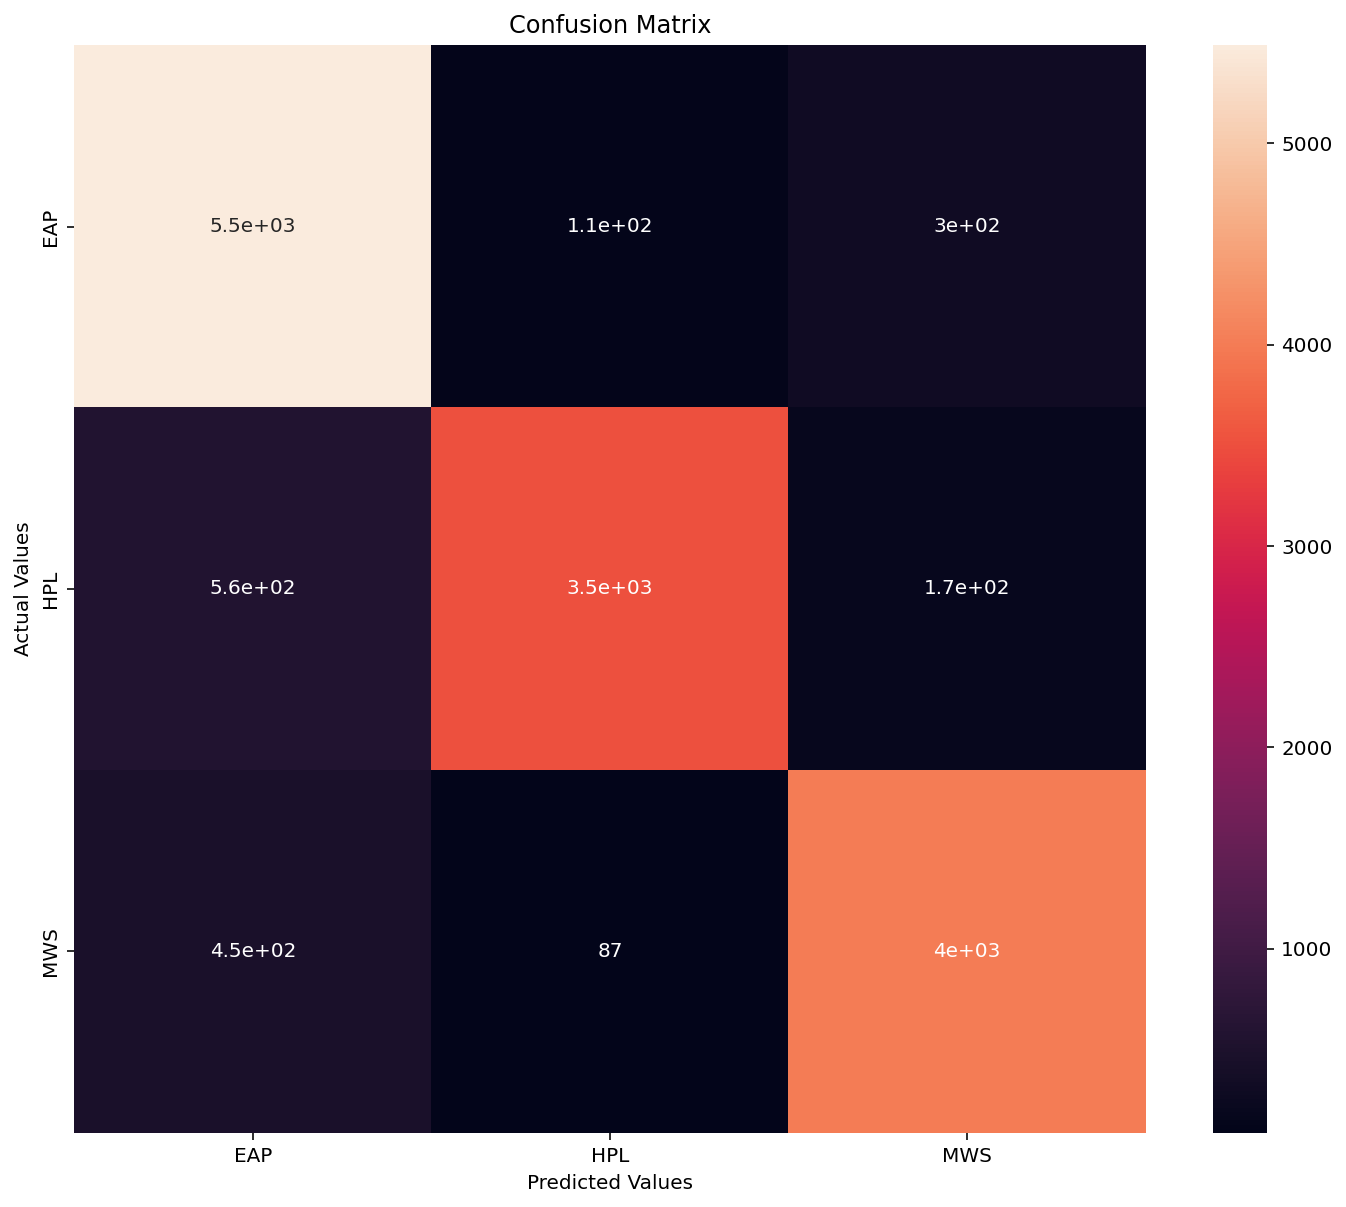

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(df1, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
test_preds = clf.predict(X_test)

In [ ]:
# Confusion matrices for test
cm_test = confusion_matrix(y_test,test_preds)

In [ ]:
df2 = pd.DataFrame(cm_test, index = ['EAP','HPL','MWS'], columns=['EAP','HPL','MWS'])

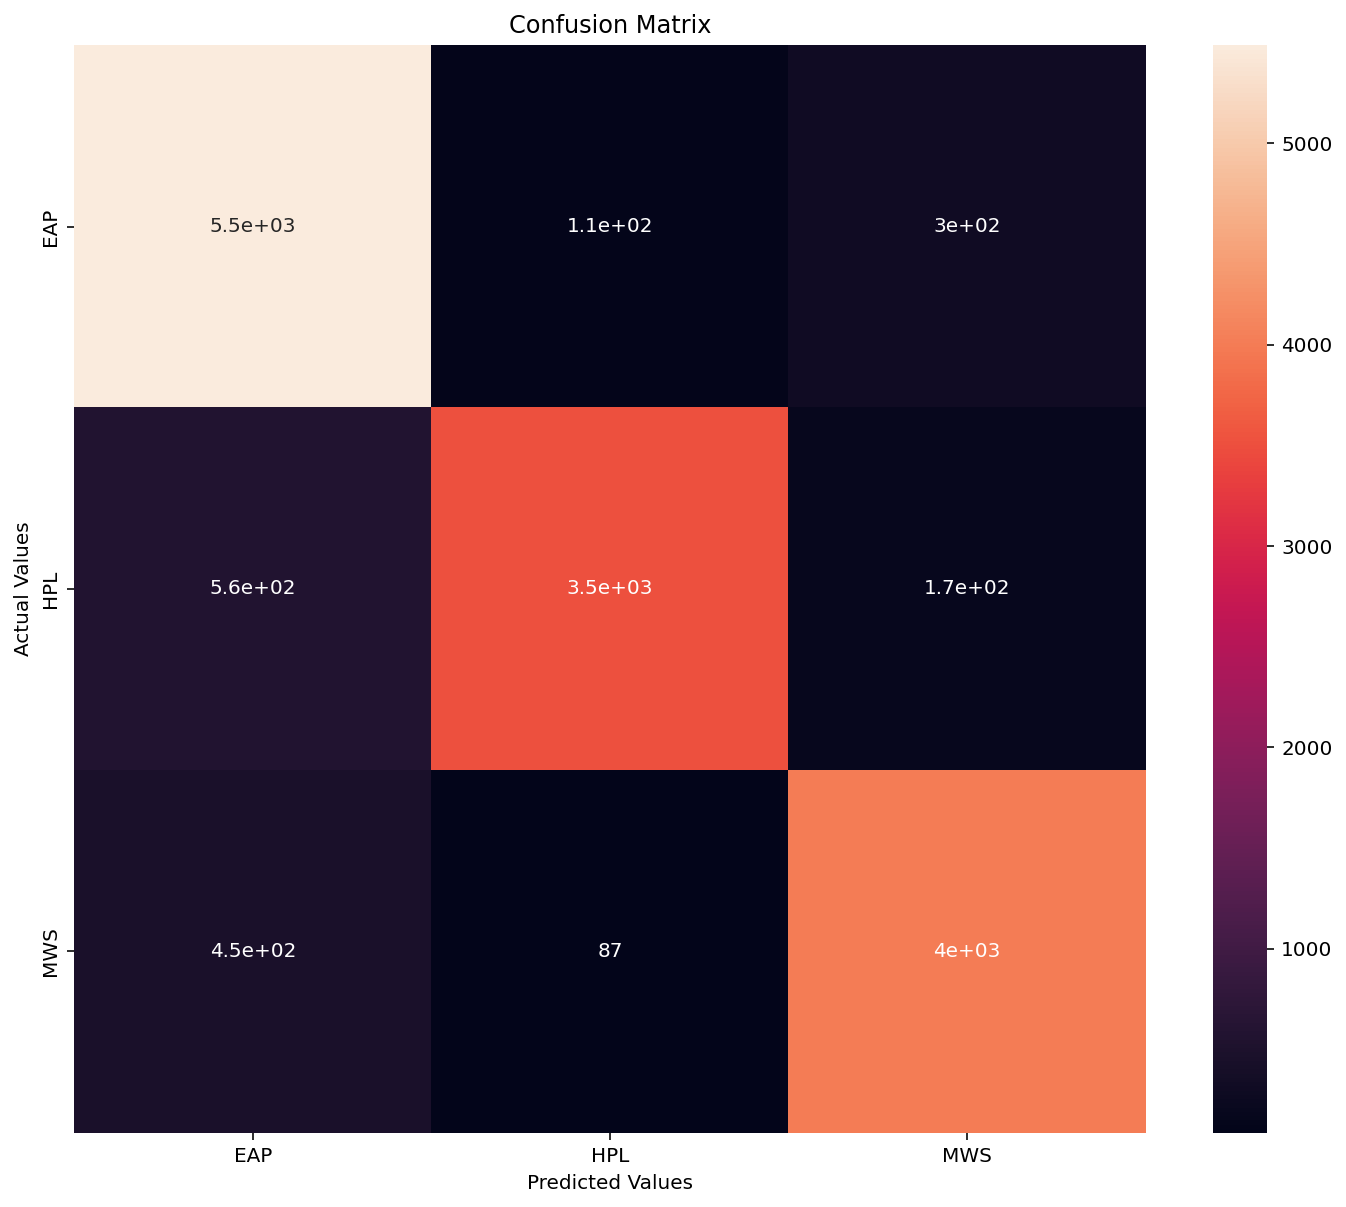

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, test_preds, target_names=data['author'].unique()))

              precision    recall  f1-score   support

         EAP       0.78      0.89      0.83      1999
         HPL       0.90      0.72      0.80      1388
         MWS       0.82      0.82      0.82      1508

    accuracy                           0.82      4895
   macro avg       0.83      0.81      0.82      4895
weighted avg       0.83      0.82      0.82      4895



#**Linear Support Vector Machine**

---



In [ ]:
SVC = LinearSVC().fit(X_train, y_train)

In [ ]:
train_preds1 = SVC.predict(X_train)

In [ ]:
# Confusion matrices for train
cm_train1 = confusion_matrix(y_train,train_preds1)

In [ ]:
df3 = pd.DataFrame(cm_train1, index = ['EAP','HPL','MWS'], columns=['EAP','HPL','MWS'])

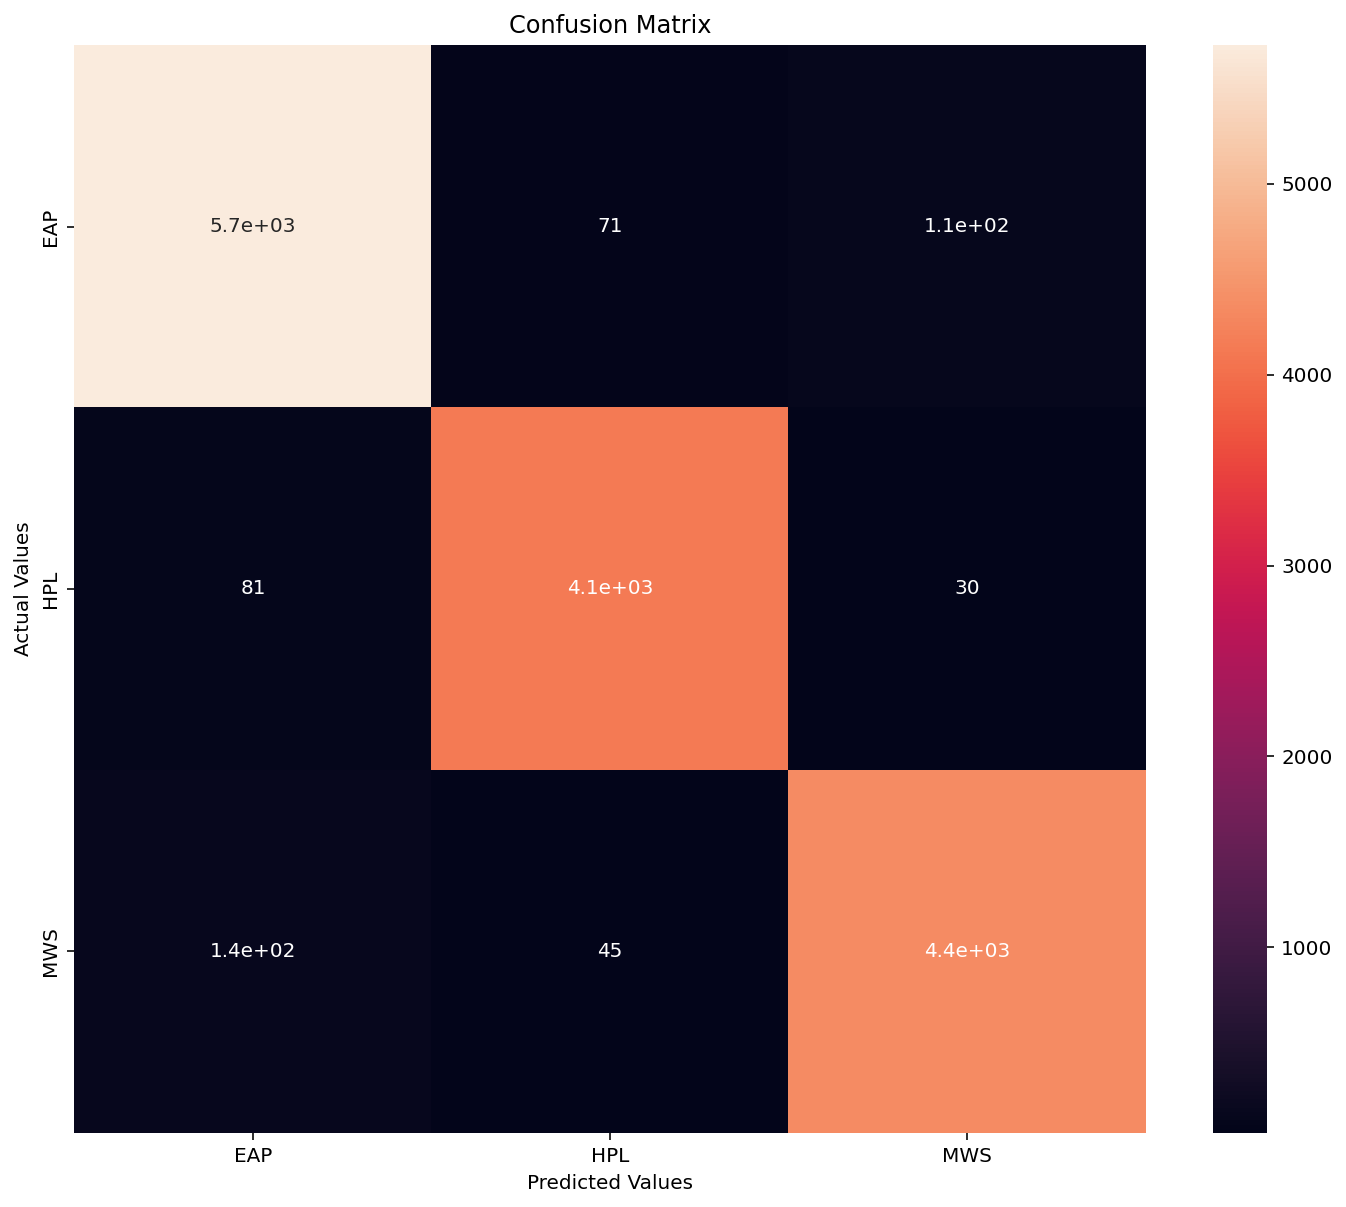

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
test_preds1 = SVC.predict(X_test)

In [ ]:
# Confusion matrices for test
cm_test1 = confusion_matrix(y_test,test_preds1)

In [ ]:
df4 = pd.DataFrame(cm_test1, index = ['EAP','HPL','MWS'], columns=['EAP','HPL','MWS'])

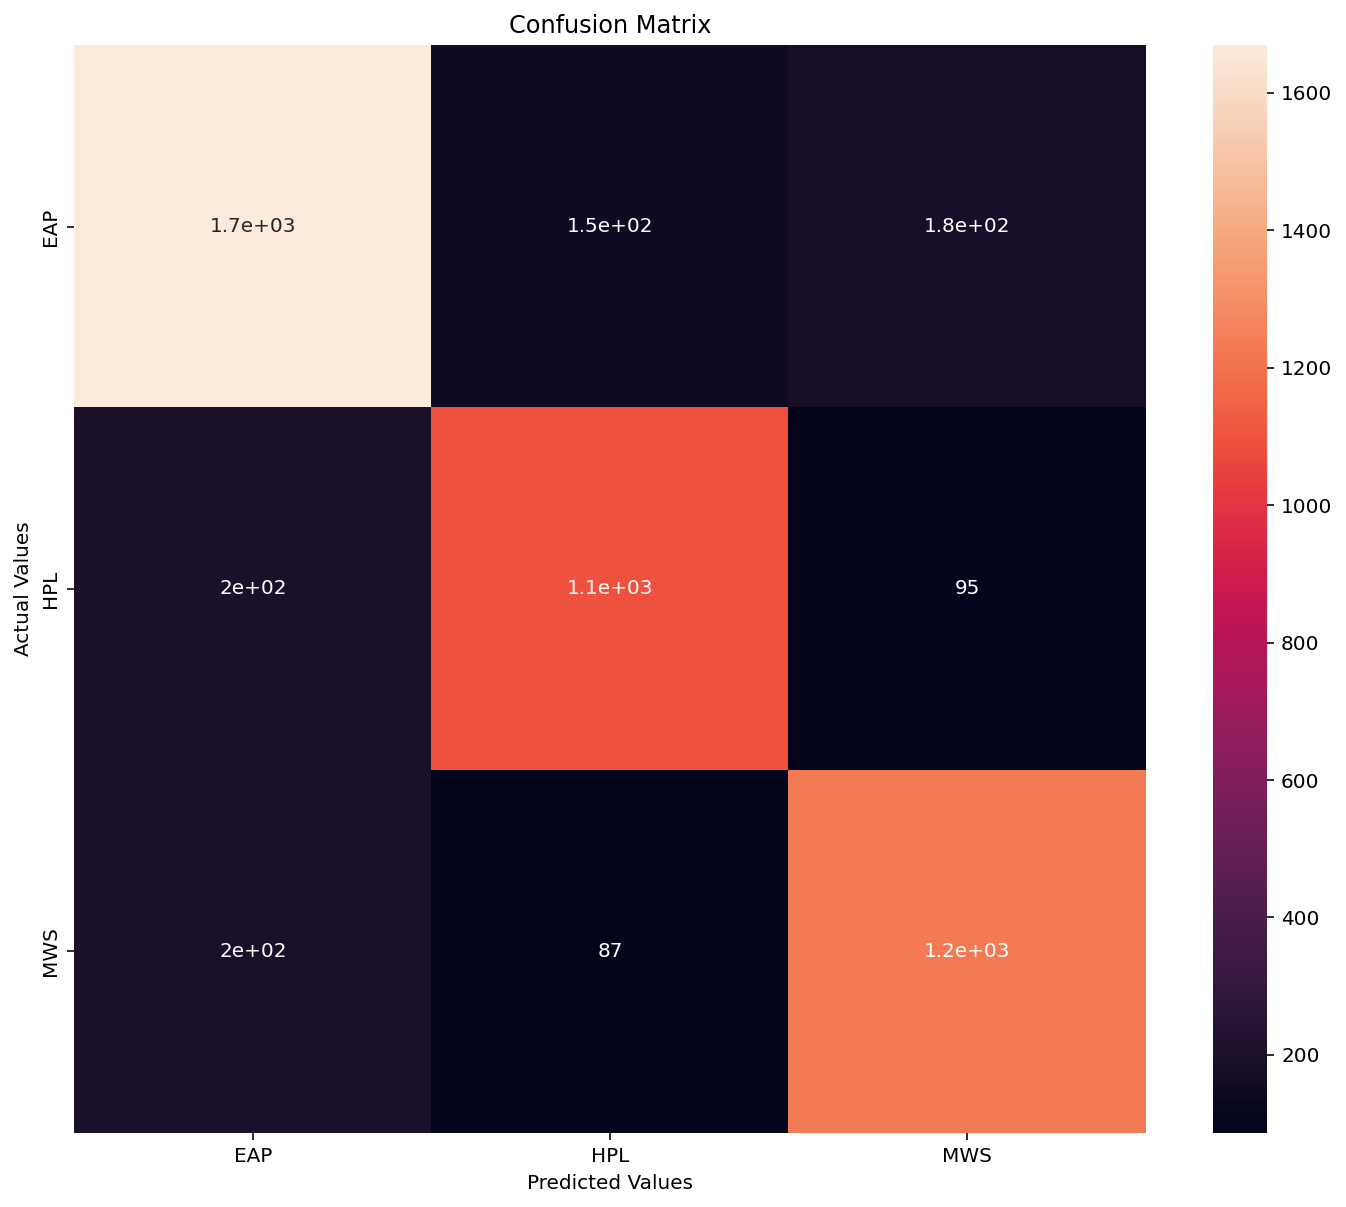

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(df4, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, test_preds1, target_names=data['author'].unique()))

              precision    recall  f1-score   support

         EAP       0.81      0.83      0.82      1999
         HPL       0.82      0.79      0.81      1388
         MWS       0.82      0.81      0.81      1508

    accuracy                           0.82      4895
   macro avg       0.82      0.81      0.81      4895
weighted avg       0.82      0.82      0.82      4895

